In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from scipy import stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import warnings

In [2]:
prices = pd.read_csv('../vbr13_16.csv', index_col='Date')

In [3]:
prices

,IEX,NUAN,MOH,NVAX,SBNY,PWR,WSM,FANG,BRO,STLD,...,KRO,UBA,HLX,RES,APEI,FF,PKI,ALGT,OII,DRQ
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-02,42.341827,20.173161,26.830000,39.400002,68.415001,27.570173,36.403950,18.077559,11.826369,11.469582,...,12.810740,12.637225,21.230000,11.387424,36.959999,5.556968,30.744074,65.984070,50.513077,75.279999
2013-01-03,42.438995,19.826839,25.730000,38.400002,68.358353,27.333094,36.572174,17.983601,11.889636,11.445485,...,12.829899,12.662830,20.860001,11.468189,37.490002,5.507789,30.657845,65.940338,50.639599,75.830002
2013-01-04,42.483166,19.861471,26.809999,38.799999,69.680199,27.619564,37.156872,18.838617,12.065879,11.726600,...,12.919306,12.611619,21.840000,11.898915,37.869999,5.463085,31.778769,67.513893,51.814526,76.209999
2013-01-07,42.704021,19.913420,27.100000,39.799999,70.152298,27.906033,36.508102,19.515118,12.029728,12.055910,...,12.829899,12.675634,21.660000,12.069415,36.900002,5.418377,31.682968,68.108353,51.425900,76.019997
2013-01-08,42.474331,20.216450,26.459999,39.000000,69.245865,28.123352,36.876518,19.355389,12.002611,11.766764,...,12.714952,12.573205,21.090000,11.871995,37.029999,5.409436,31.635069,66.954422,50.820354,76.010002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-24,76.139618,13.203463,50.299999,133.199997,115.652130,22.729834,45.272648,82.006706,16.866434,21.104288,...,4.437862,17.953333,6.590000,14.321166,26.650000,5.159124,50.860523,131.497330,29.335243,59.860001
2016-06-27,74.074966,12.744589,49.020000,125.400002,108.570801,21.455544,42.729237,78.708778,16.492254,20.307732,...,3.948220,18.174042,6.030000,13.567921,25.820000,4.872232,49.458359,128.755829,27.719482,56.369999
2016-06-28,74.654198,13.073593,49.740002,139.399994,114.792931,21.653105,44.117329,83.256355,16.951691,20.668797,...,4.064802,18.508909,6.400000,14.054194,25.730000,4.857392,49.870190,131.450806,27.690460,56.540001


In [4]:
np.random.seed(50)
stocks = np.random.choice(prices.columns, size=100, replace=False)
stocks

array(['GME', 'FANG', 'NTGR', 'MSA', 'VG', 'MDRX', 'BANR', 'MAC', 'ASH',
       'CRS', 'SAFT', 'SKT', 'SRCL', 'VRTS', 'GPI', 'BHE', 'AROC', 'HBI',
       'NWL', 'NFG', 'PFS', 'AIN', 'HR', 'BRO', 'CFR', 'HLF', 'AN',
       'MATX', 'STFC', 'PII', 'SWBI', 'LPLA', 'UVV', 'HMN', 'MOH', 'SHOO',
       'HSC', 'CLR', 'HRI', 'TG', 'HOG', 'EBIX', 'PAG', 'ACCO', 'CVBF',
       'ESE', 'AVA', 'SYNA', 'PVH', 'EPR', 'SITC', 'SWX', 'HNI', 'NNI',
       'CSGS', 'KFY', 'NYT', 'WIRE', 'GBCI', 'HI', 'AEO', 'THG', 'X',
       'LZB', 'WTM', 'MTZ', 'SANM', 'KSS', 'HOPE', 'BLMN', 'FCF', 'CRI',
       'PBI', 'SJI', 'ATO', 'NRG', 'ZGNX', 'ISBC', 'UNFI', 'AEL', 'SBRA',
       'FLO', 'AZZ', 'ABM', 'WMK', 'MOS', 'WWD', 'PLXS', 'FLS', 'BXS',
       'GRPN', 'PWR', 'AWI', 'WBS', 'PCH', 'NWE', 'UGI', 'BC', 'SAH',
       'RPT'], dtype=object)

In [5]:
prices = prices[stocks]
returns = prices.pct_change().dropna()
returns_train = returns.loc[:'2015-12-31']
returns_test = returns.loc['2016-01-01':].iloc[:75]

In [6]:
cumret = np.cumprod(returns+1)
cumret = cumret / cumret.iloc[0]
cumret_test = cumret.loc['2016-01-01':].iloc[:75]
cumret_train = cumret.loc[:'2015-12-31']
cumret = cumret.loc[:cumret_test.index[-1]]

# EM algorithm

In [7]:
def parse_pair(pair):
    s1 = pair[:pair.find('-')]
    s2 = pair[pair.find('-')+1:]
    return s1,s2

In [8]:
def outer(x):
    '''
    calculate outer product of a vector x with itself
    '''
    return np.outer(x,x)

In [9]:
def em_algorithm(a, m1, m2, n, max_iter, tol, max_trials, verbose=False):
    '''
    run em algorithm for max_iter iterations or until convergence
    
    a: time series
    m1: order of the first (stationary) AR model
    m2: order of the second (non-stationary) AR model
    n: number of lags in logistic equation
    max_iter: maximum number of iterations
    tol: tolerance for terminal conditions
    max_trials: maximum number of trials with different starting parameters
    verbose: print debug info
    '''
    
    npdf = stats.norm.pdf
    
    max_lag = max(m1,m2,n)
    converged = False
    
    trial = 0
    while (not converged) and (trial<max_trials):
        try:
            # random initial guess
            ksi = np.random.uniform(-3,3,(n+1))
            zeta_1 = np.random.uniform(-3,3,(m1+1))
            zeta_2 = np.random.uniform(-3,3,(m2+1))
            var_1 = np.random.uniform(0,6,(1))
            var_2 = np.random.uniform(0,6,(1))
            
            # create dataframe
            a_lags = [f'a_l{i}' for i in range(1,max_lag+1)]
            abs_lags = [f'abs_l{i}' for i in range(1,n+1)]
            columns = ['const', 'a'] + a_lags + abs_lags + ['p1', 'p2', 'tau1', 'tau2', 'e1', 'e2']
            df = pd.DataFrame(columns=columns)
            df['a'] = a[max_lag:]
            df['const'] = 1
            for l in range(1,max_lag+1):
                df[a_lags[l-1]] = a[max_lag-l:-l]
            for l in range(1,n+1):
                df[abs_lags[l-1]] = abs(df[a_lags[l-1]])


            for s in range(max_iter):
                # E-step
                # solve for mixing probabilities
                num = np.exp((df[['const'] + abs_lags] * ksi).sum(axis=1))
                denom = (1 + np.exp((df[['const'] + abs_lags] * ksi).sum(axis=1)))
                df['p1'] = num/denom
                df['p2'] = 1 - df['p1']

                # calculate e
                df['e1'] = df['a'] - (zeta_1 * df[['const'] + a_lags[:m1]]).sum(axis=1)
                df['e2'] = df['a'] - (zeta_2 * df[['const'] + a_lags[:m2]]).sum(axis=1)

                # calculate tau
                sigma_1 = np.sqrt(var_1)
                sigma_2 = np.sqrt(var_2)
                denom = ((df['p1'] / sigma_1) * stats.norm.pdf(df['e1'] / sigma_1) + 
                         (df['p2'] / sigma_2) * stats.norm.pdf(df['e2'] / sigma_2))
                df['tau1'] = (df['p1'] / sigma_1) * stats.norm.pdf(df['e1'] / sigma_1) / denom
                df['tau2'] = (df['p2'] / sigma_2) * stats.norm.pdf(df['e2'] / sigma_2) / denom


                # M-step

                # compute ksi
                dr_dksi = df[['const'] + abs_lags]
                dQ_dksi = (np.tile((df['tau1'] - df['p1']), (n+1,1)).T * dr_dksi).sum().values
                df['dr_dksi^2'] = df[['const'] + abs_lags].apply(outer, axis=1).apply(np.array)
                d2Q_dksi2 = -(df['p1'] * df['p2'] * df['dr_dksi^2']).sum()
                new_ksi = ksi - np.linalg.inv(d2Q_dksi2) @ dQ_dksi

                # compute zeta
                df['de1_dzeta1^2'] = df[['const'] + a_lags[:m1]].apply(outer, axis=1).apply(np.array)
                df['de2_dzeta2^2'] = df[['const'] + a_lags[:m2]].apply(outer, axis=1).apply(np.array)
                zeta1_sum1 = (df['tau1'] * df['de1_dzeta1^2']).sum()
                zeta2_sum1 = (df['tau2'] * df['de2_dzeta2^2']).sum()
                zeta1_sum2 = (-np.tile(df['tau1'] * df['a'], (m1+1,1)).T * -df[['const'] + a_lags[:m1]]).sum().values
                zeta2_sum2 = (-np.tile(df['tau2'] * df['a'], (m2+1,1)).T * -df[['const'] + a_lags[:m2]]).sum().values
                new_zeta_1 = np.linalg.inv(zeta1_sum1) @ zeta1_sum2
                new_zeta_2 = np.linalg.inv(zeta2_sum1) @ zeta2_sum2

                # compute variance
                sigma1_sum2 = (df['tau1'] * (df['a'] + np.dot(-df[['const'] + a_lags[:m1]], new_zeta_1))**2).sum()
                sigma2_sum2 = (df['tau2'] * (df['a'] + np.dot(-df[['const'] + a_lags[:m2]], new_zeta_2))**2).sum()
                new_var_1 = 1/df['tau1'].sum() * sigma1_sum2
                new_var_2 = 1/df['tau2'].sum() * sigma2_sum2

                # calculate the difference between old and new values of parameters
                delta_ksi = np.sum(abs(new_ksi - ksi))
                delta_zeta_1 = np.sum(abs(new_zeta_1 - zeta_1))
                delta_zeta_2 = np.sum(abs(new_zeta_2 - zeta_2))
                delta_var_1 = np.sum(abs(new_var_1 - var_1))
                delta_var_2 = np.sum(abs(new_var_2 - var_2))

                # update parameters
                ksi = new_ksi
                zeta_1 = new_zeta_1
                zeta_2 = new_zeta_2
                var_1 = new_var_1
                var_2 = new_var_2

                # if any parameter is nan, stop
                nansum = (np.isnan(ksi).sum() + np.isnan(zeta_1).sum() + np.isnan(zeta_2).sum() + 
                          np.isnan(var_1).sum() + np.isnan(var_2).sum())
                if nansum != 0:
                    break

                # calculate total difference between old and new parameters
                delta_total = delta_ksi + delta_zeta_1 + delta_zeta_2 + delta_var_1 + delta_var_2

                # check convergence
                if delta_total < tol:
                    # calculate roots of characteristic polynomial of the second regime
                    char_pol = np.polynomial.polynomial.Polynomial(np.concatenate(([1],-zeta_2[1:])))
                    # calculate reciprocal roots and take absolute value
                    roots = np.abs(1/char_pol.roots())

                    # convergence conditions
                    conv_cond = (sum(roots>=1) > 0) # at least one reciprocal root >= 1

                    if conv_cond:
                        if verbose:
                            print('Converged at iteration ', s)
                        converged = True
                        break
                    else:
                        break

            if not converged:
                trial += 1
                if verbose:
                    print(f'Algorithm not converged')
                    print('Repeating with different initital values')

        except:
            continue
            
     # calculate Q
    Q_sum1 = (df['tau1'] * (np.log(df['p1']) - 1/2*np.log(var_1) - df['e1']**2 / (2 * var_1))).sum()
    Q_sum2 = (df['tau2'] * (np.log(df['p2']) - 1/2*np.log(var_2) - df['e2']**2 / (2 * var_2))).sum()
    Q = Q_sum1 + Q_sum2
        
    return ksi, zeta_1, var_1, zeta_2, var_2, Q, converged

# Estimate model dimensions

In [10]:
pairs = []
for s1 in prices.columns:
    for s2 in prices.columns:
        if (s1!=s2) and (f'{s2}-{s1}' not in pairs):
            pairs.append(f'{s1}-{s2}')

In [11]:
len(pairs)

4950

In [12]:
'''
import itertools
import warnings

max_iter = 100
tol = 0.1
max_trials = 5


lmar_df = pd.DataFrame(index=pairs, columns = ['m1','m2','n','BIC', 'num_fit',
                                            r'$\delta_0$', r'$\delta_1$', r'$\delta_2$', 
                                            r'$\phi_{1,0}$', r'$\phi_{1,1}$', r'$\phi_{1,2}$', r'$\sigma_1^2$', 
                                            r'$\phi_{2,0}$', r'$\phi_{2,1}$', r'$\phi_{2,2}$', r'$\sigma_2^2$'])


for pair in lmar_df.index:
    print(f'Processing pair {pair} ...')
    s1,s2 = parse_pair(pair)
    
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]
    spread = spread.values
    
    best_bic = np.inf
    best_m1, best_m2, best_n = 0,0,0
    best_ksi, best_zeta_1, best_zeta_2, best_var_1, best_var_2 = 0,0,0,0,0
    num_fit = 0

    for m1,m2,n in itertools.product([1,2],[1,2],[1,2]):

        with warnings.catch_warnings():
            warnings.simplefilter('ignore') # supress warnings from EM algorithm
            # run EM algorithm
            ksi, zeta_1, var_1, zeta_2, var_2, Q, converged = em_algorithm(spread, m1, m2, n, 
                                                                           max_iter, tol, max_trials)
        
        # compute ll and bic
        if converged:
            print(f'{pair} fitted!')
            num_fit += 1
            bic = -2*Q + np.log(len(spread) - max(m1,m2,n)) * (2 + m1 + m2 + n)
        else:
            bic = np.inf
        #print(f'm1={m1}, m2={m2}, n={n}: BIC={bic}')
        
        if bic < best_bic:
            best_bic = bic
            best_m1, best_m2, best_n = m1,m2,n
            best_ksi, best_zeta_1, best_var_1, best_zeta_2, best_var_2 = ksi, zeta_1, var_1, zeta_2, var_2
    
    if best_bic < np.inf:
        # make all arrays of size 3
        best_ksi = np.concatenate([best_ksi, np.zeros(3-len(best_ksi))])
        best_zeta_1 = np.concatenate([best_zeta_1, np.zeros(3-len(best_zeta_1))])
        best_zeta_2 = np.concatenate([best_zeta_2, np.zeros(3-len(best_zeta_2))])
        
        # save best parameters to dataframe
        lmar_df.loc[pair] = [best_m1, best_m2, best_n, best_bic, num_fit, best_ksi[0], best_ksi[1], best_ksi[2], 
                                best_zeta_1[0], best_zeta_1[1], best_zeta_1[2], best_var_1, 
                                best_zeta_2[0], best_zeta_2[1], best_zeta_2[2], best_var_2]
        lmar_df.to_csv('lmar_models_df.csv')
'''

"\nimport itertools\nimport warnings\n\nmax_iter = 100\ntol = 0.1\nmax_trials = 5\n\n\nlmar_df = pd.DataFrame(index=pairs, columns = ['m1','m2','n','BIC', 'num_fit',\n                                            r'$\\delta_0$', r'$\\delta_1$', r'$\\delta_2$', \n                                            r'$\\phi_{1,0}$', r'$\\phi_{1,1}$', r'$\\phi_{1,2}$', r'$\\sigma_1^2$', \n                                            r'$\\phi_{2,0}$', r'$\\phi_{2,1}$', r'$\\phi_{2,2}$', r'$\\sigma_2^2$'])\n\n\nfor pair in lmar_df.index:\n    print(f'Processing pair {pair} ...')\n    s1,s2 = parse_pair(pair)\n    \n    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()\n    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]\n    spread = spread.values\n    \n    best_bic = np.inf\n    best_m1, best_m2, best_n = 0,0,0\n    best_ksi, best_zeta_1, best_zeta_2, best_var_1, best_var_2 = 0,0,0,0,0\n    num_fit = 0\n\n    for m1,m2,n in itertools.product(

In [13]:
lmar_df = pd.read_csv('lmar_models_df.csv', index_col=0)

In [14]:
pd.set_option("display.precision", 4)
lmar_df

,m1,m2,n,BIC,num_fit,$\delta_0$,$\delta_1$,$\delta_2$,"$\phi_{1,0}$","$\phi_{1,1}$","$\phi_{1,2}$",$\sigma_1^2$,"$\phi_{2,0}$","$\phi_{2,1}$","$\phi_{2,2}$",$\sigma_2^2$
GME-FANG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GME-NTGR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GME-MSA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GME-VG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GME-MDRX,1.0,2.0,2.0,-3877.3327,4.0,-2.6420,9.6226,-9.4579,-1.8532e-02,0.8670,0.0000,0.0124,0.0016,0.9319,0.0682,1.0007e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UGI-SAH,2.0,2.0,2.0,-4747.2426,2.0,3.6836,-24.1458,48.9882,6.6604e-04,0.9625,0.0261,0.0008,0.0104,2.1334,0.2429,5.5788e-32
UGI-RPT,1.0,2.0,2.0,-4458.3174,3.0,-2.2228,17.1509,-8.4386,-8.3266e-04,0.9614,0.0000,0.0010,0.0001,0.8779,0.1223,2.5593e-04
BC-SAH,2.0,1.0,2.0,-4014.3538,4.0,0.3235,-0.4467,3.3004,4.7112e-04,0.9602,0.0254,0.0009,0.0018,1.0110,0.0000,1.4681e-04
BC-RPT,1.0,1.0,2.0,-4452.5844,3.0,0.7809,4.0857,11.5120,-7.3481e-05,0.9792,0.0000,0.0007,0.0010,1.0997,0.0000,4.8243e-05


# Estimate parameters and their standard deviations

In [15]:
parameters_df = lmar_df[lmar_df['num_fit']>4]

In [16]:
parameters_df = parameters_df[['m1','m2','n','BIC',r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']]
parameters_df['Spread SD'] = 0

In [17]:
for pair in parameters_df.index:
    s1,s2 = parse_pair(pair)
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]
    spread = spread.values
    parameters_df.loc[pair, 'Spread SD'] = spread.std()

In [18]:
parameters_df.sort_values(by='Spread SD')

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD
SKT-HI,2.0,2.0,2.0,-5602.3067,-1.5892,75.2114,-74.6804,0.0496
SKT-SANM,1.0,1.0,2.0,-5685.8465,-2.0414,105.3687,-99.3294,0.0512
PFS-WBS,1.0,2.0,1.0,-5985.3655,2.9674,6.2879,0.0000,0.0525
SKT-BC,2.0,2.0,2.0,-5693.4069,-2.0574,96.2776,-89.5766,0.0527
SKT-HBI,1.0,2.0,1.0,-5695.9913,-2.4448,12.5885,0.0000,0.0528
...,...,...,...,...,...,...,...,...
FANG-ZGNX,2.0,2.0,1.0,-2904.6967,-10.7615,40.5551,0.0000,1.0026
FANG-HRI,2.0,2.0,1.0,-2666.1008,4.6073,-3.5440,0.0000,1.0029
FANG-SJI,2.0,1.0,1.0,-2582.7839,3.9024,-3.2187,0.0000,1.0033
FANG-BLMN,1.0,1.0,1.0,-2856.4317,0.5597,5.4220,0.0000,1.0036


In [19]:
'''
parameters = {}

max_iter=150
tol = 0.05
max_trials = 5

for pair in parameters_df.index:
    print(f'Processing pair {pair}')
    
    # construct spread
    s1,s2 = parse_pair(pair)
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]
    spread = spread.values
    
    m1,m2,n = parameters_df.loc[pair, ['m1','m2','n']].astype(int)
    ksis = np.empty((10,n+1))
    ksis[:] = np.nan # initialize ksis to np.nan
    
    for i in range(10):
        # run EM
        with warnings.catch_warnings():
            warnings.simplefilter('ignore') # supress warnings from EM algorithm
            ksi, zeta_1, var_1, zeta_2, var_2, Q, converged = em_algorithm(spread, m1, m2, n, 
                                                                           max_iter, tol, max_trials)
            if converged:
                ksis[i,:] = ksi # save parameters
    parameters[pair] = ksis
'''

"\nparameters = {}\n\nmax_iter=150\ntol = 0.05\nmax_trials = 5\n\nfor pair in parameters_df.index:\n    print(f'Processing pair {pair}')\n    \n    # construct spread\n    s1,s2 = parse_pair(pair)\n    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()\n    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]\n    spread = spread.values\n    \n    m1,m2,n = parameters_df.loc[pair, ['m1','m2','n']].astype(int)\n    ksis = np.empty((10,n+1))\n    ksis[:] = np.nan # initialize ksis to np.nan\n    \n    for i in range(10):\n        # run EM\n        with warnings.catch_warnings():\n            warnings.simplefilter('ignore') # supress warnings from EM algorithm\n            ksi, zeta_1, var_1, zeta_2, var_2, Q, converged = em_algorithm(spread, m1, m2, n, \n                                                                           max_iter, tol, max_trials)\n            if converged:\n                ksis[i,:] = ksi # save parameters\n    

In [20]:
# https://www.askpython.com/python/examples/detection-removal-outliers-in-python
def remove_outliers(data):
    data = np.array(data)
    
    # don't do anything if there is no variability in data
    if data.std() < 0.001:
        return data
    
    p75, p25 = np.percentile(data, [75,25], axis=0)
    iqr = p75-p25
    max_val = p75 + 1.5*iqr
    min_val = p25 - 1.5*iqr
    
    for i in range(data.shape[0]):
        if sum(data[i,:]>max_val)>0 or sum(data[i,:]<min_val)>0:
            data[i,:] = [np.nan] * data.shape[1]
    
    return data

In [21]:
parameters_df[r'SD($\delta_0$)'] = np.inf
parameters_df[r'SD($\delta_1$)'] = np.inf
parameters_df[r'SD($\delta_2$)'] = np.inf
parameters_df['num_conv'] = 0
parameters_df

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv
GME-GPI,1.0,1.0,1.0,-3747.9802,-1.7246,0.0612,0.0000,0.2840,inf,inf,inf,0
GME-AIN,1.0,2.0,2.0,-3865.3946,-2.5849,4.5302,-3.6707,0.2683,inf,inf,inf,0
GME-BRO,2.0,2.0,1.0,-3551.1489,-2.3414,1.8230,0.0000,0.2595,inf,inf,inf,0
GME-MOH,2.0,2.0,2.0,-3497.1836,-1.1785,-0.6465,0.7272,0.2966,inf,inf,inf,0
GME-HNI,2.0,2.0,2.0,-3858.2161,-2.1870,4.8714,-4.6099,0.2937,inf,inf,inf,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PWR-SAH,1.0,1.0,1.0,-5322.9404,3.7881,-1.3533,0.0000,0.1407,inf,inf,inf,0
PWR-RPT,1.0,1.0,2.0,-5255.7069,3.3493,23.6727,-23.7318,0.1483,inf,inf,inf,0
WBS-SAH,2.0,2.0,2.0,-4612.2379,-2.1102,-37.2663,37.3689,0.2674,inf,inf,inf,0
PCH-SAH,1.0,2.0,2.0,-5605.6788,-2.7195,-35.7202,40.1710,0.0867,inf,inf,inf,0


In [22]:
'''
for pair in parameters_df.index:
    num_conv = 10 - np.isnan(parameters[pair]).sum() / parameters[pair].shape[1]
    data = remove_outliers(parameters[pair])
    median = np.nanmedian(data, axis=0)
    std = np.nanstd(data, axis=0)
    
    parameters_df.loc[pair, ['num_conv']] = num_conv
    if data.shape[1]==3:
        parameters_df.loc[pair, [r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']] = median
        parameters_df.loc[pair, [r'SD($\delta_0$)', r'SD($\delta_1$)', r'SD($\delta_2$)']] = std
    else:
        parameters_df.loc[pair, [r'$\delta_0$', r'$\delta_1$']] = median
        parameters_df.loc[pair, [r'SD($\delta_0$)', r'SD($\delta_1$)']] = std
'''

"\nfor pair in parameters_df.index:\n    num_conv = 10 - np.isnan(parameters[pair]).sum() / parameters[pair].shape[1]\n    data = remove_outliers(parameters[pair])\n    median = np.nanmedian(data, axis=0)\n    std = np.nanstd(data, axis=0)\n    \n    parameters_df.loc[pair, ['num_conv']] = num_conv\n    if data.shape[1]==3:\n        parameters_df.loc[pair, [r'$\\delta_0$', r'$\\delta_1$', r'$\\delta_2$']] = median\n        parameters_df.loc[pair, [r'SD($\\delta_0$)', r'SD($\\delta_1$)', r'SD($\\delta_2$)']] = std\n    else:\n        parameters_df.loc[pair, [r'$\\delta_0$', r'$\\delta_1$']] = median\n        parameters_df.loc[pair, [r'SD($\\delta_0$)', r'SD($\\delta_1$)']] = std\n"

In [23]:
#parameters_df.to_csv('lmar_parameters_df.csv')

In [24]:
parameters_df = pd.read_csv('lmar_parameters_df.csv', index_col=0)
parameters_df

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv
GME-GPI,1.0,1.0,1.0,-3747.9802,-1.9044,0.1644,0.0000,0.2840,0.0085,0.0078,inf,3
GME-AIN,1.0,2.0,2.0,-3865.3946,-2.6121,4.7039,-3.8442,0.2683,0.0221,0.1420,0.1419,10
GME-BRO,2.0,2.0,1.0,-3551.1489,-2.3124,1.8882,0.0000,0.2595,0.0299,0.0018,inf,10
GME-MOH,2.0,2.0,2.0,-3497.1836,NaN,NaN,NaN,0.2966,NaN,NaN,NaN,0
GME-HNI,2.0,2.0,2.0,-3858.2161,NaN,NaN,NaN,0.2937,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
PWR-SAH,1.0,1.0,1.0,-5322.9404,3.6679,-1.3470,0.0000,0.1407,0.2452,1.8243,inf,8
PWR-RPT,1.0,1.0,2.0,-5255.7069,3.3614,23.8424,-23.8874,0.1483,0.0005,0.0066,0.0061,10
WBS-SAH,2.0,2.0,2.0,-4612.2379,-1.7301,-33.6427,33.7204,0.2674,0.7317,7.0595,6.0864,7
PCH-SAH,1.0,2.0,2.0,-5605.6788,-2.6883,-35.6176,40.0162,0.0867,0.0276,0.1643,0.2053,9


# Select tradable pairs

In [25]:
pairs_df = parameters_df[parameters_df['num_conv']>=5]

In [26]:
cond1 = ((pairs_df[r'$\delta_1$'] > 2*pairs_df[r'SD($\delta_1$)']) & 
         (abs(pairs_df[r'$\delta_2$']) <= 2*pairs_df[r'SD($\delta_2$)']))
cond2 = ((pairs_df[r'$\delta_2$'] > 2*pairs_df[r'SD($\delta_2$)']) & 
         (abs(pairs_df[r'$\delta_1$']) <= 2*pairs_df[r'SD($\delta_1$)']))
cond3 = ((pairs_df[r'$\delta_1$'] > 2*pairs_df[r'SD($\delta_1$)']) & 
         (pairs_df[r'$\delta_2$'] > 2*pairs_df[r'SD($\delta_2$)']))

pairs_df = pairs_df[cond1 | cond2 | cond3]

In [27]:
pairs_df

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv
GME-BRO,2.0,2.0,1.0,-3551.1489,-2.3124,1.8882,0.0000,0.2595,0.0299,0.0018,inf,10
FANG-SYNA,2.0,2.0,1.0,-1996.1322,-0.6115,0.2751,0.0000,0.3938,0.5584,0.1299,inf,7
FANG-AEO,2.0,1.0,1.0,-2329.9582,0.3564,2.3319,0.0000,0.8653,0.3685,0.1747,inf,5
FANG-MOS,2.0,2.0,1.0,-2078.7991,0.1918,2.7304,0.0000,0.8282,0.3119,0.5930,inf,10
MSA-CVBF,1.0,2.0,1.0,-5063.6478,0.2284,3.8691,0.0000,0.0938,0.1936,0.2786,inf,7
...,...,...,...,...,...,...,...,...,...,...,...,...
ISBC-NWE,2.0,2.0,1.0,-4714.5640,-1.6112,6.7300,0.0000,0.0957,0.6541,1.6680,inf,9
SBRA-BC,2.0,2.0,1.0,-4782.6266,-2.2039,4.8833,0.0000,0.1447,0.3326,0.2010,inf,9
SBRA-RPT,1.0,2.0,2.0,-5092.1524,-2.4956,3.0486,3.7156,0.1087,0.0130,0.1154,0.1716,10
MOS-RPT,2.0,1.0,1.0,-5263.8938,-2.9053,15.8961,0.0000,0.1195,0.3309,2.5178,inf,10


In [28]:
# create a list of pairs with opposite (long and short) positions
long_short_pairs = []

for pair in pairs_df.index:
    # calculate spread
    s1,s2 = parse_pair(pair)
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    if res.params[s2] > 0:
        long_short_pairs.append(pair)
        
pairs_df = pairs_df.loc[long_short_pairs]

In [29]:
pairs_df

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv
GME-BRO,2.0,2.0,1.0,-3551.1489,-2.3124,1.8882,0.0000,0.2595,0.0299,0.0018,inf,10
FANG-SYNA,2.0,2.0,1.0,-1996.1322,-0.6115,0.2751,0.0000,0.3938,0.5584,0.1299,inf,7
MSA-CVBF,1.0,2.0,1.0,-5063.6478,0.2284,3.8691,0.0000,0.0938,0.1936,0.2786,inf,7
VG-UVV,1.0,1.0,1.0,-3830.1666,2.2882,0.5115,0.0000,0.4446,0.0439,0.0629,inf,10
BANR-PII,2.0,2.0,1.0,-4628.0566,-2.9556,12.5786,0.0000,0.1651,0.6820,1.5585,inf,8
...,...,...,...,...,...,...,...,...,...,...,...,...
ISBC-UNFI,1.0,2.0,2.0,-5384.7849,-2.0458,0.7542,2.3627,0.2488,0.2835,1.1003,1.1784,10
ISBC-NWE,2.0,2.0,1.0,-4714.5640,-1.6112,6.7300,0.0000,0.0957,0.6541,1.6680,inf,9
SBRA-BC,2.0,2.0,1.0,-4782.6266,-2.2039,4.8833,0.0000,0.1447,0.3326,0.2010,inf,9
SBRA-RPT,1.0,2.0,2.0,-5092.1524,-2.4956,3.0486,3.7156,0.1087,0.0130,0.1154,0.1716,10


In [30]:
# calculate 0.95 and 0.5 quantile of probability of being in mean-reverting regime
pairs_df['pq95'] = 0
pairs_df['pq50'] = 0

for pair in pairs_df.index:
    # construct spread
    s1,s2 = parse_pair(pair)
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret_train[s1] - res.params['const'] - res.params[s2] * cumret_train[s2]
    spread = spread.values
    
    ksi = pairs_df.loc[pair][[r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']].values
    p = np.empty(len(spread))
    for i in range(2,len(p)):
        r = ksi[0] + ksi[1] * abs(spread[i-1]) + ksi[2] * abs(spread[i-2])
        p[i] = np.exp(r) / (1 + np.exp(r))
    p = p[2:]
    
    pq95 = np.quantile(p,0.95)
    pq50 = np.quantile(p,0.5)
    pairs_df.loc[pair, ['pq95']] = pq95
    pairs_df.loc[pair, ['pq50']] = pq50

In [31]:
pairs_df.sort_values(by='Spread SD').head(10)

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv,pq95,pq50
PFS-WBS,1.0,2.0,1.0,-5985.3655,3.0647,6.1682,0.0,0.0525,0.1557,0.4555,inf,9,0.9768,0.9637
SKT-HBI,1.0,2.0,1.0,-5695.9913,-1.1871,9.0622,0.0,0.0528,0.4711,3.0371,inf,7,0.4439,0.2908
SKT-NWL,2.0,1.0,1.0,-5743.0634,-2.0769,11.3883,0.0,0.0537,0.5008,2.6087,inf,8,0.2903,0.1571
SKT-NNI,1.0,2.0,1.0,-5708.1878,-0.6388,8.4775,0.0,0.0540,0.9672,3.5624,inf,7,0.5823,0.4064
SKT-PAG,2.0,2.0,1.0,-6159.2995,-1.3652,9.5769,0.0,0.0545,0.8509,2.2144,inf,8,0.4351,0.2565
SKT-WWD,1.0,1.0,1.0,-5729.9224,-1.4144,10.3472,0.0,0.0546,0.8317,3.3699,inf,9,0.4321,0.2513
SJI-SBRA,2.0,1.0,1.0,-5619.2502,-3.9276,33.2525,0.0,0.0549,0.1787,0.4717,inf,6,0.3883,0.0744
SKT-CRI,1.0,1.0,1.0,-5737.5535,-1.9311,16.6811,0.0,0.0558,0.4488,2.5281,inf,9,0.5119,0.2030
SKT-CVBF,2.0,2.0,1.0,-5786.7358,-1.1540,8.7877,0.0,0.0558,0.6234,2.4925,inf,9,0.4688,0.2963
SKT-MOS,2.0,2.0,1.0,-5760.7982,-2.0008,9.6467,0.0,0.0561,0.6210,0.5240,inf,10,0.2973,0.1547


In [32]:
selected_pairs = []
selected_stocks = []

for pair in pairs_df.sort_values(by='Spread SD').index[:10]:
    s1,s2 = parse_pair(pair)
    
    if (s1 not in selected_stocks) and (s2 not in selected_stocks):
    
        pq95 = pairs_df.loc[pair, ['pq95']].values # probability 0.95 quantile
        
        # calculate spread
        res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
        spread = cumret[s1] - res.params['const'] - res.params[s2] * cumret[s2]
        spread = spread.iloc[-77:-50] # add two more days in the beginning for lagged values 

        # check if there is an open signal in 25 days
        ksi = pairs_df.loc[pair][[r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']].values
        for t in spread[2:].index:
            lag1 = spread.loc[:t].iloc[-2]
            lag2 = spread.loc[:t].iloc[-3]

            # calculate p
            r = ksi[0] + ksi[1] * abs(lag1) + ksi[2] * abs(lag2)
            p = np.exp(r) / (1 + np.exp(r))

            if p>pq95:
                selected_stocks.append(s1)
                selected_stocks.append(s2)
                selected_pairs.append(pair)
                break

In [33]:
print(selected_pairs)

['PFS-WBS']


In [34]:
pairs_df.loc[selected_pairs]

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv,pq95,pq50
PFS-WBS,1.0,2.0,1.0,-5985.3655,3.0647,6.1682,0.0,0.0525,0.1557,0.4555,inf,9,0.9768,0.9637


In [35]:
positions = pd.DataFrame(index=cumret_test.index, columns=selected_stocks)
pos_opened_index = {pair:np.inf for pair in selected_pairs} # index when position was opened

for pair in selected_pairs:
    s1,s2 = parse_pair(pair)
    
    pq95 = pairs_df.loc[pair, ['pq95']].values
    pq50 = pairs_df.loc[pair, ['pq50']].values
    
    # calculate spread
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret[s1] - res.params['const'] - res.params[s2] * cumret[s2]
    spread = spread.iloc[-77:] # add two more days for lagged values
    
    # determine positions
    ksi = pairs_df.loc[pair][[r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']].values
    
    i = 0 # time index
    for t in spread[2:].index:
        lag1 = spread.loc[:t].iloc[-2]
        lag2 = spread.loc[:t].iloc[-3]
        
        # calculate p
        r = ksi[0] + ksi[1] * abs(lag1) + ksi[2] * abs(lag2)
        p = np.exp(r) / (1 + np.exp(r))
        
        if p>pq95 and i<25: # open positions only during first 25 days
            # save time index
            if pos_opened_index[pair]==np.inf:
                pos_opened_index[pair] = i
            
            # open position
            if spread.loc[t] < 0:
                positions.loc[t, [s1,s2]] = [1,-res.params[s2]] # open long position
            else:
                positions.loc[t, [s1,s2]] = [-1,res.params[s2]] # open short position
                
        elif p<pq50 or (i-pos_opened_index[pair])>=50:
            positions.loc[t, [s1,s2]] = [0,0] # close position
            
        i += 1

In [36]:
positions.iloc[0] = np.zeros(len(positions.columns))
positions.fillna(method='ffill', inplace=True)

In [37]:
returns_test = returns.loc[positions.index, positions.columns]
pair_returns = pd.DataFrame(index=positions.index, columns=selected_pairs)
for pair in pair_returns.columns:
    s1,s2 = parse_pair(pair)
    pair_returns[pair] = (positions.shift()[[s1, s2]] * returns_test[[s1, s2]]).sum(axis=1)

In [38]:
(pair_returns+1).cumprod(axis=0)

,PFS-WBS
Date,
2016-01-04,1.0000
2016-01-05,1.0000
2016-01-06,1.0000
2016-01-07,1.0000
2016-01-08,1.0000
...,...
2016-04-14,1.0381
2016-04-15,1.0381
2016-04-18,1.0381


In [39]:
def calculate_metrics(cumret):
    '''
    calculate performance metrics from cumulative returns
    '''
    total_return = (cumret[-1] - cumret[0])/cumret[0]
    apr = (1+total_return)**(252/len(cumret)) - 1
    rets = pd.DataFrame(cumret).pct_change()
    sharpe = np.sqrt(252) * np.nanmean(rets) / np.nanstd(rets)
    
    # maxdd and maxddd
    highwatermark=np.zeros(cumret.shape)
    drawdown=np.zeros(cumret.shape)
    drawdownduration=np.zeros(cumret.shape)
    for t in np.arange(1, cumret.shape[0]):
        highwatermark[t]=np.maximum(highwatermark[t-1], cumret[t])
        drawdown[t]=cumret[t]/highwatermark[t]-1
        if drawdown[t]==0:
            drawdownduration[t]=0
        else:
            drawdownduration[t]=drawdownduration[t-1]+1
    maxDD=np.min(drawdown)
    maxDDD=np.max(drawdownduration)
    
    return total_return, apr, sharpe, maxDD, maxDDD

In [40]:
cumret_algo = (pair_returns.sum(axis=1)/len(selected_pairs) + 1).cumprod()

In [41]:
cumret_algo.diff().tail(50)

Date
2016-02-09    0.0005
2016-02-10   -0.0090
2016-02-11   -0.0042
2016-02-12   -0.0054
2016-02-16    0.0083
2016-02-17    0.0106
2016-02-18   -0.0157
2016-02-19    0.0000
2016-02-22    0.0000
2016-02-23    0.0000
2016-02-24    0.0000
2016-02-25    0.0000
2016-02-26    0.0000
2016-02-29    0.0000
2016-03-01    0.0000
2016-03-02    0.0000
2016-03-03    0.0000
2016-03-04    0.0000
2016-03-07    0.0000
2016-03-08    0.0000
2016-03-09    0.0000
2016-03-10    0.0000
2016-03-11    0.0000
2016-03-14    0.0000
2016-03-15    0.0000
2016-03-16    0.0000
2016-03-17    0.0000
2016-03-18    0.0000
2016-03-21    0.0000
2016-03-22    0.0000
2016-03-23    0.0000
2016-03-24    0.0000
2016-03-28    0.0000
2016-03-29    0.0000
2016-03-30    0.0000
2016-03-31    0.0000
2016-04-01    0.0000
2016-04-04    0.0000
2016-04-05    0.0000
2016-04-06    0.0000
2016-04-07    0.0000
2016-04-08    0.0000
2016-04-11    0.0000
2016-04-12    0.0000
2016-04-13    0.0000
2016-04-14    0.0000
2016-04-15    0.0000
2016-04-

In [42]:
cumret_algo = cumret_algo.loc[:'2016-02-18'] # cut the days after last position is closed

In [43]:
results_df = pd.DataFrame(columns=['Total return', 'APR', 'Sharpe', 'maxDD', 'maxDDD'])
results_df.loc['Algo'] = calculate_metrics(cumret_algo)
results_df

,Total return,APR,Sharpe,maxDD,maxDDD
Algo,0.0381,0.3419,3.3217,-0.0176,4.0


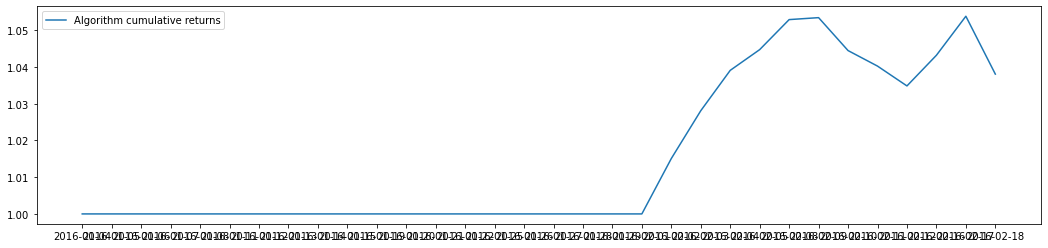

In [44]:
plt.figure(figsize=(18,4))
plt.plot(cumret_algo, label='Algorithm cumulative returns')
plt.legend()

In [45]:
positions[positions['PFS']!=0].head()

,PFS,WBS
Date,,
2016-02-01,-1.0,0.4638
2016-02-02,-1.0,0.4638
2016-02-03,-1.0,0.4638
2016-02-04,-1.0,0.4638
2016-02-05,-1.0,0.4638


In [46]:
cumret_algo = (pair_returns.sum(axis=1)/0.4638 + 1).cumprod()

In [47]:
cumret_algo = cumret_algo.loc[:'2016-02-18'] # cut the days after last position is closed

In [48]:
results_df.loc['Algo (alt. calc.)'] = calculate_metrics(cumret_algo)

In [49]:
results_df

,Total return,APR,Sharpe,maxDD,maxDDD
Algo,0.0381,0.3419,3.3217,-0.0176,4.0
Algo (alt. calc.),0.0824,0.8652,3.3217,-0.0378,4.0


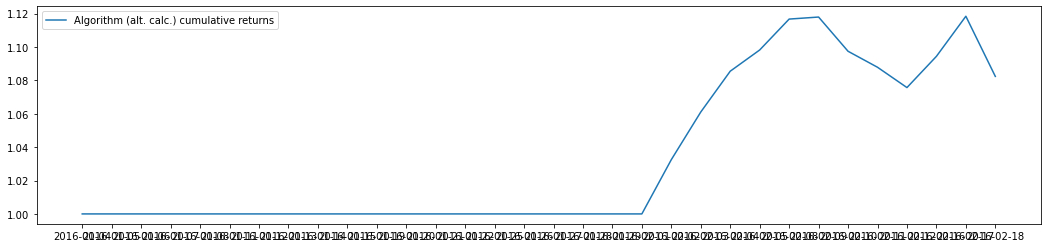

In [50]:
plt.figure(figsize=(18,4))
plt.plot(cumret_algo, label='Algorithm (alt. calc.) cumulative returns')
plt.legend()

# Longer observation period (30 days)

In [69]:
selected_pairs = []
selected_stocks = []

for pair in pairs_df.sort_values(by='Spread SD').index[:10]:
    s1,s2 = parse_pair(pair)
    
    if (s1 not in selected_stocks) and (s2 not in selected_stocks):
    
        pq95 = pairs_df.loc[pair, ['pq95']].values # probability 0.95 quantile
        
        # calculate spread
        res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
        spread = cumret[s1] - res.params['const'] - res.params[s2] * cumret[s2]
        spread = spread.iloc[-77:-45] # add two more days for lagged values 

        # check if there is an open signal in 30 days
        ksi = pairs_df.loc[pair][[r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']].values
        for t in spread[2:].index:
            lag1 = spread.loc[:t].iloc[-2]
            lag2 = spread.loc[:t].iloc[-3]

            # calculate p
            r = ksi[0] + ksi[1] * abs(lag1) + ksi[2] * abs(lag2)
            p = np.exp(r) / (1 + np.exp(r))

            if p>pq95:
                selected_stocks.append(s1)
                selected_stocks.append(s2)
                selected_pairs.append(pair)
                break

In [70]:
print(selected_pairs)

['PFS-WBS', 'SJI-SBRA']


In [71]:
pairs_df.loc[selected_pairs]

,m1,m2,n,BIC,$\delta_0$,$\delta_1$,$\delta_2$,Spread SD,SD($\delta_0$),SD($\delta_1$),SD($\delta_2$),num_conv,pq95,pq50
PFS-WBS,1.0,2.0,1.0,-5985.3655,3.0647,6.1682,0.0,0.0525,0.1557,0.4555,inf,9,0.9768,0.9637
SJI-SBRA,2.0,1.0,1.0,-5619.2502,-3.9276,33.2525,0.0,0.0549,0.1787,0.4717,inf,6,0.3883,0.0744


In [72]:
positions = pd.DataFrame(index=cumret_test.index, columns=selected_stocks)
positions

,PFS,WBS,SJI,SBRA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-04-14,NaN,NaN,NaN,NaN
2016-04-15,NaN,NaN,NaN,NaN
2016-04-18,NaN,NaN,NaN,NaN


In [73]:
pos_opened_index = {pair:np.inf for pair in selected_pairs} # index when position was opened

for pair in selected_pairs:
    s1,s2 = parse_pair(pair)
    
    pq95 = pairs_df.loc[pair, ['pq95']].values
    pq50 = pairs_df.loc[pair, ['pq50']].values
    
    # calculate spread
    res = sm.OLS(cumret_train[s1], sm.add_constant(cumret_train[s2])).fit()
    spread = cumret[s1] - res.params['const'] - res.params[s2] * cumret[s2]
    spread = spread.iloc[-77:] # add two more days for lagged values
    
    # determine positions
    ksi = pairs_df.loc[pair][[r'$\delta_0$', r'$\delta_1$', r'$\delta_2$']].values
    
    i = 0 # time index
    for t in spread[2:].index:
        lag1 = spread.loc[:t].iloc[-2]
        lag2 = spread.loc[:t].iloc[-3]
        
        # calculate p
        r = ksi[0] + ksi[1] * abs(lag1) + ksi[2] * abs(lag2)
        p = np.exp(r) / (1 + np.exp(r))
        
        if p>pq95 and i<30: # open positions only during first 30 days
            # save time index
            if pos_opened_index[pair]==np.inf:
                pos_opened_index[pair] = i
            
            # open position
            if spread.loc[t] < 0:
                positions.loc[t, [s1,s2]] = [1,-res.params[s2]] # open long position
            else:
                positions.loc[t, [s1,s2]] = [-1,res.params[s2]] # open short position
                
        elif p<pq50 or (i-pos_opened_index[pair])>=50:
            positions.loc[t, [s1,s2]] = [0,0] # close position
            
        i += 1

In [74]:
positions

,PFS,WBS,SJI,SBRA
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,NaN,NaN,NaN,NaN
2016-01-06,NaN,NaN,NaN,NaN
2016-01-07,NaN,NaN,NaN,NaN
2016-01-08,NaN,NaN,NaN,NaN
...,...,...,...,...
2016-04-14,0,0,NaN,NaN
2016-04-15,0,0,NaN,NaN
2016-04-18,0,0,NaN,NaN


In [75]:
positions.iloc[0] = np.zeros(len(positions.columns))
positions.fillna(method='ffill', inplace=True)

In [76]:
returns_test = returns.loc[positions.index, positions.columns]
pair_returns = pd.DataFrame(index=positions.index, columns=selected_pairs)
for pair in pair_returns.columns:
    s1,s2 = parse_pair(pair)
    pair_returns[pair] = (positions.shift()[[s1, s2]] * returns_test[[s1, s2]]).sum(axis=1)

In [77]:
(pair_returns+1).cumprod(axis=0)

,PFS-WBS,SJI-SBRA
Date,,
2016-01-04,1.0000,1.0000
2016-01-05,1.0000,1.0000
2016-01-06,1.0000,1.0000
2016-01-07,1.0000,1.0000
2016-01-08,1.0000,1.0000
...,...,...
2016-04-14,1.0381,1.0638
2016-04-15,1.0381,1.0638
2016-04-18,1.0381,1.0638


In [78]:
cumret_algo = (pair_returns.sum(axis=1)/len(selected_pairs) + 1).cumprod()

In [79]:
cumret_algo.diff().tail(50)

Date
2016-02-09    0.0003
2016-02-10   -0.0044
2016-02-11   -0.0063
2016-02-12   -0.0030
2016-02-16    0.0044
2016-02-17    0.0197
2016-02-18   -0.0184
2016-02-19    0.0084
2016-02-22   -0.0025
2016-02-23    0.0079
2016-02-24   -0.0005
2016-02-25   -0.0012
2016-02-26    0.0119
2016-02-29    0.0161
2016-03-01   -0.0073
2016-03-02    0.0000
2016-03-03    0.0000
2016-03-04    0.0000
2016-03-07    0.0000
2016-03-08    0.0000
2016-03-09    0.0000
2016-03-10    0.0000
2016-03-11    0.0000
2016-03-14    0.0000
2016-03-15    0.0000
2016-03-16    0.0000
2016-03-17    0.0000
2016-03-18    0.0000
2016-03-21    0.0000
2016-03-22    0.0000
2016-03-23    0.0000
2016-03-24    0.0000
2016-03-28    0.0000
2016-03-29    0.0000
2016-03-30    0.0000
2016-03-31    0.0000
2016-04-01    0.0000
2016-04-04    0.0000
2016-04-05    0.0000
2016-04-06    0.0000
2016-04-07    0.0000
2016-04-08    0.0000
2016-04-11    0.0000
2016-04-12    0.0000
2016-04-13    0.0000
2016-04-14    0.0000
2016-04-15    0.0000
2016-04-

In [80]:
cumret_algo = cumret_algo.loc[:'2016-03-01'] # cut the days after last position is closed

In [81]:
results_df.loc['Algo 30d'] = calculate_metrics(cumret_algo)
results_df

,Total return,APR,Sharpe,maxDD,maxDDD
Algo,0.0381,0.3419,3.3217,-0.0176,4.0
Algo (alt. calc.),0.0824,0.8652,3.3217,-0.0378,4.0
Algo 30d,0.0513,0.3703,3.4342,-0.0177,6.0
Algo 30d (alt. calc.),0.1598,1.5452,3.4342,-0.0542,6.0


In [82]:
positions[positions['PFS']!=0]

,PFS,WBS,SJI,SBRA
Date,,,,
2016-02-01,-1.0,0.4638,0.0,0.0000
2016-02-02,-1.0,0.4638,0.0,0.0000
2016-02-03,-1.0,0.4638,0.0,0.0000
2016-02-04,-1.0,0.4638,0.0,0.0000
2016-02-05,-1.0,0.4638,0.0,0.0000
2016-02-08,-1.0,0.4638,0.0,0.0000
2016-02-09,-1.0,0.4638,0.0,0.0000
2016-02-10,-1.0,0.4638,-1.0,0.1904
2016-02-11,-1.0,0.4638,-1.0,0.1904


In [83]:
sum([0.4638, 0.1904])

0.6542

In [84]:
cumret_algo = (pair_returns.sum(axis=1)/0.6542 + 1).cumprod()
cumret_algo = cumret_algo.loc[:'2016-03-01'] # cut the days after last position is closed

In [85]:
results_df.loc['Algo 30d (alt. calc.)'] = calculate_metrics(cumret_algo)
results_df

,Total return,APR,Sharpe,maxDD,maxDDD
Algo,0.0381,0.3419,3.3217,-0.0176,4.0
Algo (alt. calc.),0.0824,0.8652,3.3217,-0.0378,4.0
Algo 30d,0.0513,0.3703,3.4342,-0.0177,6.0
Algo 30d (alt. calc.),0.1598,1.5452,3.4342,-0.0542,6.0


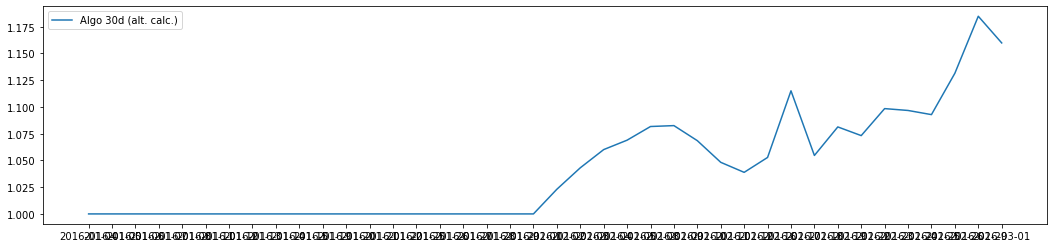

In [86]:
plt.figure(figsize=(18,4))
plt.plot(cumret_algo, label='Algo 30d (alt. calc.)')
plt.legend()